<a href="https://colab.research.google.com/github/cyber-prags/Exploratory-Data-Analysis-of-Spectroscopic-Plant-Data/blob/main/EDA_on_Plant_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact
import ipywidgets as widgets
from scipy.stats import mannwhitneyu
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# Loading the dataset

In [ ]:
df = pd.read_csv('/content/dataset.csv')
df.head()

,Unnamed: 0,health,Oxygen,Nitrogen,Carbon,800,817,834,851,868,...,2345,2362,2379,2396,2414,2431,2448,2465,2482,2500
0,0,good,13.954075,5.037830,1.621110,0.077391,0.361438,0.844744,0.980954,0.567932,...,0.953042,0.923926,0.891456,0.855594,0.816593,0.774882,0.730992,0.685506,0.639026,0.592142
1,1,good,14.117162,4.929451,1.620945,0.000418,0.000814,0.001835,0.004705,0.012626,...,0.913223,0.881176,0.848009,0.813607,0.777990,0.741284,0.703687,0.665448,0.626842,0.588156
2,2,good,13.887550,5.094304,1.659878,0.000269,0.000583,0.001244,0.002599,0.005370,...,0.994001,0.978897,0.960836,0.939793,0.915855,0.889193,0.860037,0.828658,0.795358,0.760456
3,3,good,14.090322,4.953540,1.655001,0.016582,0.033451,0.090168,0.255736,0.586586,...,1.053253,1.025011,0.997814,0.970590,0.942551,0.913165,0.882114,0.849266,0.814634,0.778348
4,4,good,13.883325,4.833700,1.629026,0.000007,0.000017,0.000044,0.000117,0.000314,...,0.994699,0.958020,0.922047,0.886307,0.850472,0.814333,0.777792,0.740836,0.703528,0.665985


In [ ]:
df.drop(df.columns[0],axis=1, inplace=True)
df.head()

,health,Oxygen,Nitrogen,Carbon,800,817,834,851,868,885,...,2345,2362,2379,2396,2414,2431,2448,2465,2482,2500
0,good,13.954075,5.037830,1.621110,0.077391,0.361438,0.844744,0.980954,0.567932,0.170132,...,0.953042,0.923926,0.891456,0.855594,0.816593,0.774882,0.730992,0.685506,0.639026,0.592142
1,good,14.117162,4.929451,1.620945,0.000418,0.000814,0.001835,0.004705,0.012626,0.032668,...,0.913223,0.881176,0.848009,0.813607,0.777990,0.741284,0.703687,0.665448,0.626842,0.588156
2,good,13.887550,5.094304,1.659878,0.000269,0.000583,0.001244,0.002599,0.005370,0.011305,...,0.994001,0.978897,0.960836,0.939793,0.915855,0.889193,0.860037,0.828658,0.795358,0.760456
3,good,14.090322,4.953540,1.655001,0.016582,0.033451,0.090168,0.255736,0.586586,0.975807,...,1.053253,1.025011,0.997814,0.970590,0.942551,0.913165,0.882114,0.849266,0.814634,0.778348
4,good,13.883325,4.833700,1.629026,0.000007,0.000017,0.000044,0.000117,0.000314,0.000835,...,0.994699,0.958020,0.922047,0.886307,0.850472,0.814333,0.777792,0.740836,0.703528,0.665985


# Exploratory Data Analysis

In [ ]:
df.describe()

,Oxygen,Nitrogen,Carbon,800,817,834,851,868,885,903,...,2345,2362,2379,2396,2414,2431,2448,2465,2482,2500
count,300.000000,300.000000,300.000000,3.000000e+02,3.000000e+02,300.000000,300.000000,300.000000,300.000000,300.000000,...,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,13.894078,5.035839,1.676798,2.041595e-02,3.587084e-02,0.061126,0.098436,0.152902,0.228143,0.317935,...,0.990549,0.947028,0.905248,0.864400,0.823927,0.783493,0.742938,0.702239,0.661476,0.620801
std,0.135240,0.108120,0.043922,6.313955e-02,9.714537e-02,0.145981,0.198992,0.253063,0.312185,0.351958,...,0.096373,0.092122,0.091654,0.093465,0.096364,0.099548,0.102520,0.104994,0.106812,0.107898
min,13.527662,4.755666,1.546617,1.070534e-07,2.603095e-07,0.000001,0.000006,0.000013,0.000032,0.000078,...,0.654003,0.614290,0.575305,0.537058,0.499628,0.463132,0.427705,0.393483,0.360596,0.329162
25%,13.792483,4.965638,1.648660,1.084870e-04,3.160761e-04,0.000797,0.002217,0.005617,0.010987,0.028028,...,0.937731,0.898675,0.857733,0.813491,0.768714,0.723615,0.679606,0.637655,0.597212,0.556648
50%,13.890655,5.033961,1.677131,9.382236e-04,2.263321e-03,0.005053,0.011645,0.027144,0.067320,0.150463,...,0.981665,0.946097,0.905749,0.864942,0.824175,0.782606,0.740563,0.699308,0.655728,0.614224
75%,13.996430,5.107571,1.706098,7.338917e-03,1.746647e-02,0.033234,0.075585,0.188448,0.357113,0.556305,...,1.044691,0.998551,0.961694,0.926638,0.887038,0.845900,0.807954,0.765855,0.727930,0.687608
max,14.265343,5.363437,1.833981,4.327732e-01,5.580823e-01,0.844744,0.980954,1.072365,1.063278,1.146838,...,1.389004,1.301514,1.222258,1.154021,1.112861,1.071746,1.030417,0.988663,0.948800,0.921266


The above code shows that the variance is really low for our measurements.

In [ ]:
df.shape

(300, 104)

In [ ]:
df.isna().sum()

health      0
Oxygen      0
Nitrogen    0
Carbon      0
800         0
           ..
2431        0
2448        0
2465        0
2482        0
2500        0
Length: 104, dtype: int64

In [ ]:
print(f'Duplicates: {df.duplicated().sum()}')

Duplicates: 0


We see there are no missing or duplicate values present in our dataset; which is a good thing.

In [ ]:
df['health'].unique()

array(['good', 'disease1'], dtype=object)

In [ ]:
health_status_counts = df['health'].value_counts(normalize=True) * 100
print(health_status_counts)


good        50.0
disease1    50.0
Name: health, dtype: float64


<ipython-input-12-b6d4f45c8434>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=health_status_counts.index, y=health_status_counts.values, palette=['green', 'red'])


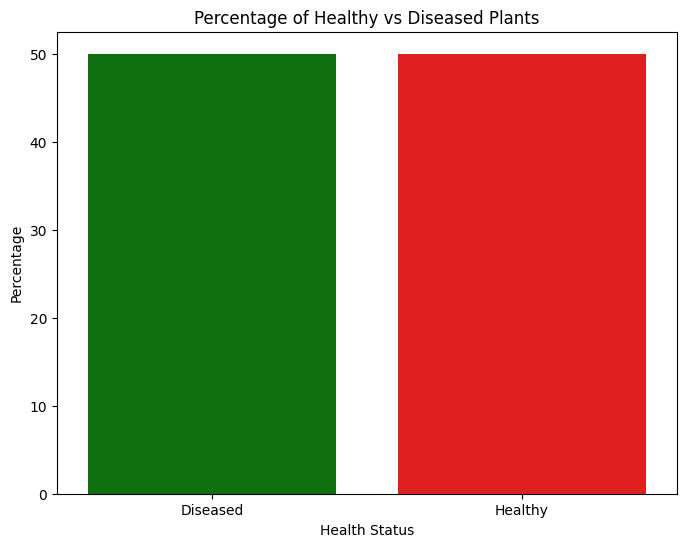

In [ ]:
df['health'] = df['health'].map({'good': 1, 'disease1': 0})

# Calculate the percentage of healthy and diseased plants
health_status_counts = df['health'].value_counts(normalize=True) * 100

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x=health_status_counts.index, y=health_status_counts.values, palette=['green', 'red'])
plt.title('Percentage of Healthy vs Diseased Plants')
plt.ylabel('Percentage')
plt.xlabel('Health Status')
plt.xticks(ticks=[0, 1], labels=['Diseased', 'Healthy'])
plt.show()

In [ ]:
# let us divide our dataset into two sets; one with wavelength data and another with elemental data
element_columns = df.columns[1:4]
wavelength_columns = df.columns[4:-1]

### Let us analyze the elemental data first

<ipython-input-14-a5cf1c7d0f7e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='health', y=element, data=df, palette='coolwarm')
<ipython-input-14-a5cf1c7d0f7e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='health', y=element, data=df, palette='coolwarm')
<ipython-input-14-a5cf1c7d0f7e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='health', y=element, data=df, palette='coolwarm')


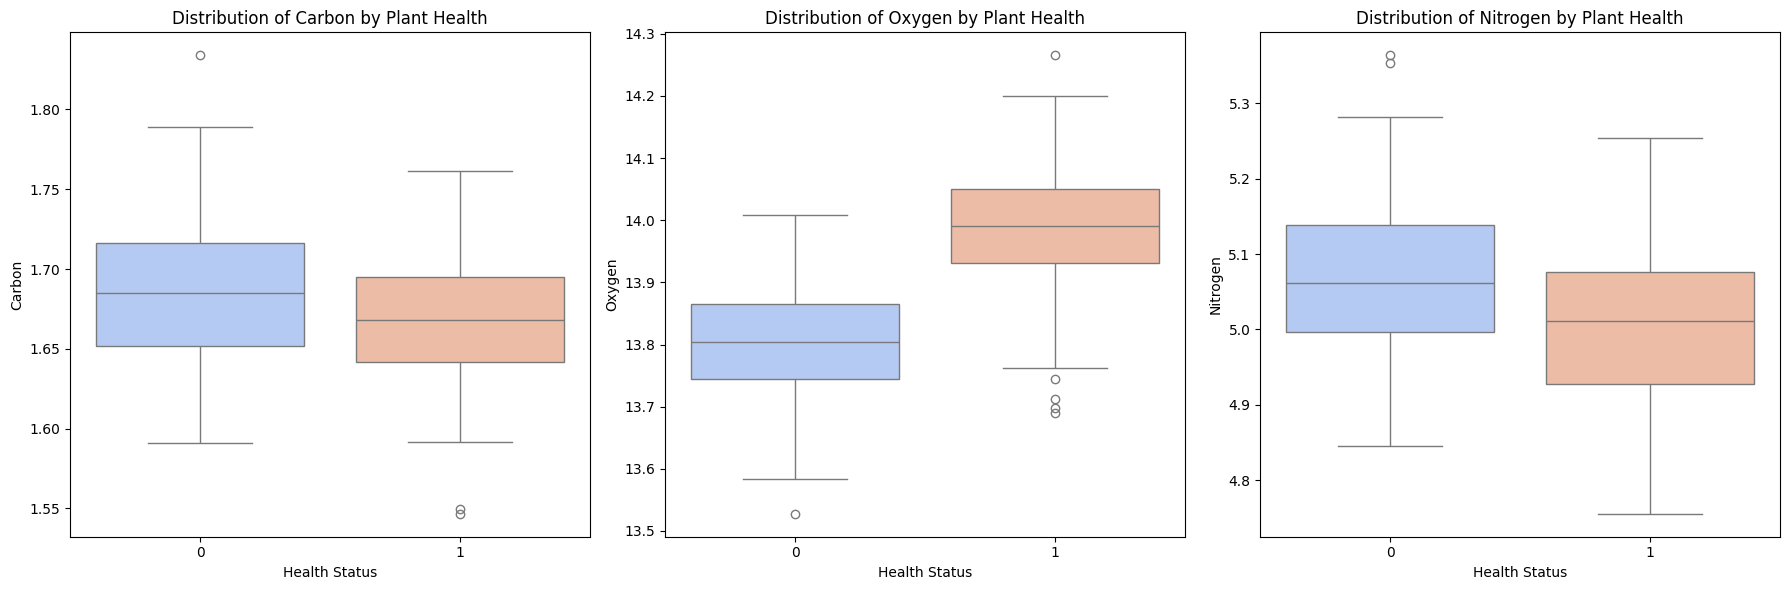

In [ ]:
elements = ['Carbon', 'Oxygen', 'Nitrogen']

# Plot boxplots for each element to see the distribution by health status
plt.figure(figsize=(18, 6))
for i, element in enumerate(elements, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='health', y=element, data=df, palette='coolwarm')
    plt.title(f'Distribution of {element} by Plant Health')
    plt.xlabel('Health Status')
    plt.ylabel(element)

plt.tight_layout()
plt.show()

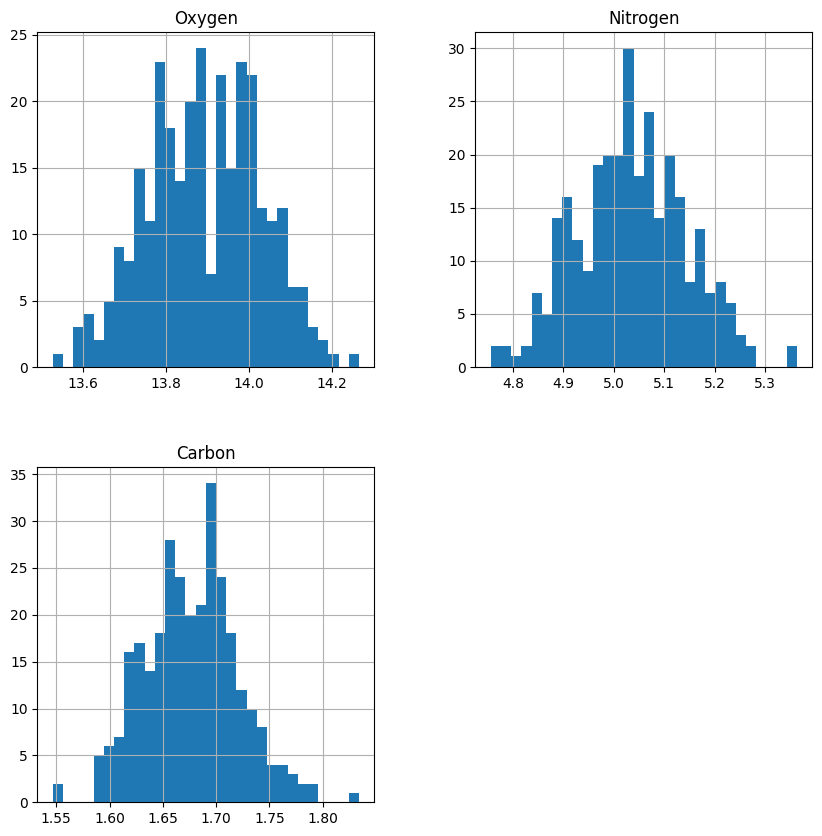

In [ ]:
element_columns = df.columns[1:4]  # assuming the wavelength columns start at index 4
df[element_columns].hist(bins=30, figsize=(10, 10))
plt.show()

It seems like Oxygen, Nitrogen and Carbon are normally distributed across our dataset suggesting consistent presence in the dataset.

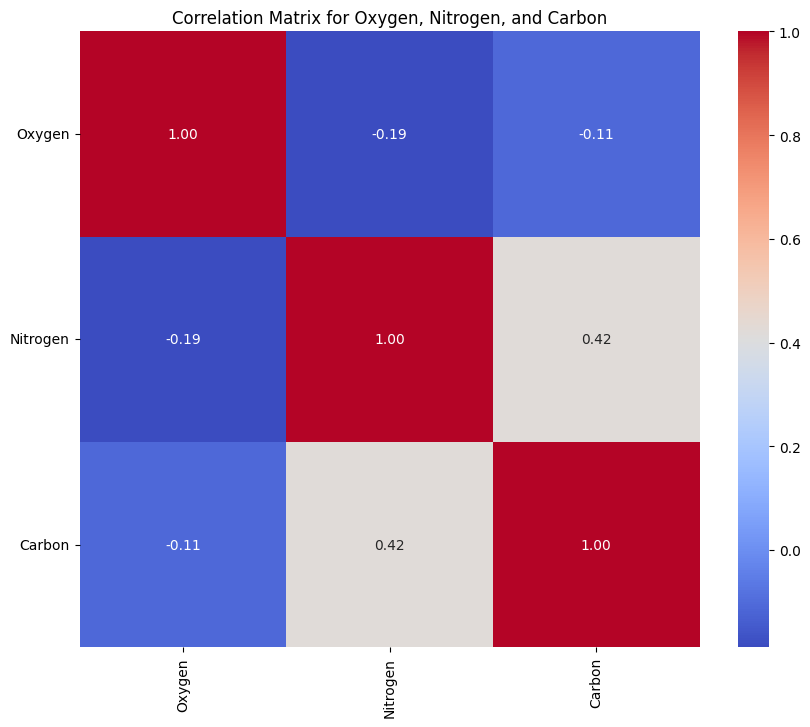

In [ ]:
# Calculate the correlation matrix for the selected elements
element_correlation_matrix = df[element_columns].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))  # Adjust the size as necessary
sns.heatmap(element_correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix for Oxygen, Nitrogen, and Carbon')
plt.xticks(rotation=90)
plt.yticks(rotation=0)  # Keep the y-axis labels horizontal
plt.show()

We see that Nitrogen and Carbon has a positive correlartion meaning the value of Carbon goes up when the value of Nitrogen goes up as well.

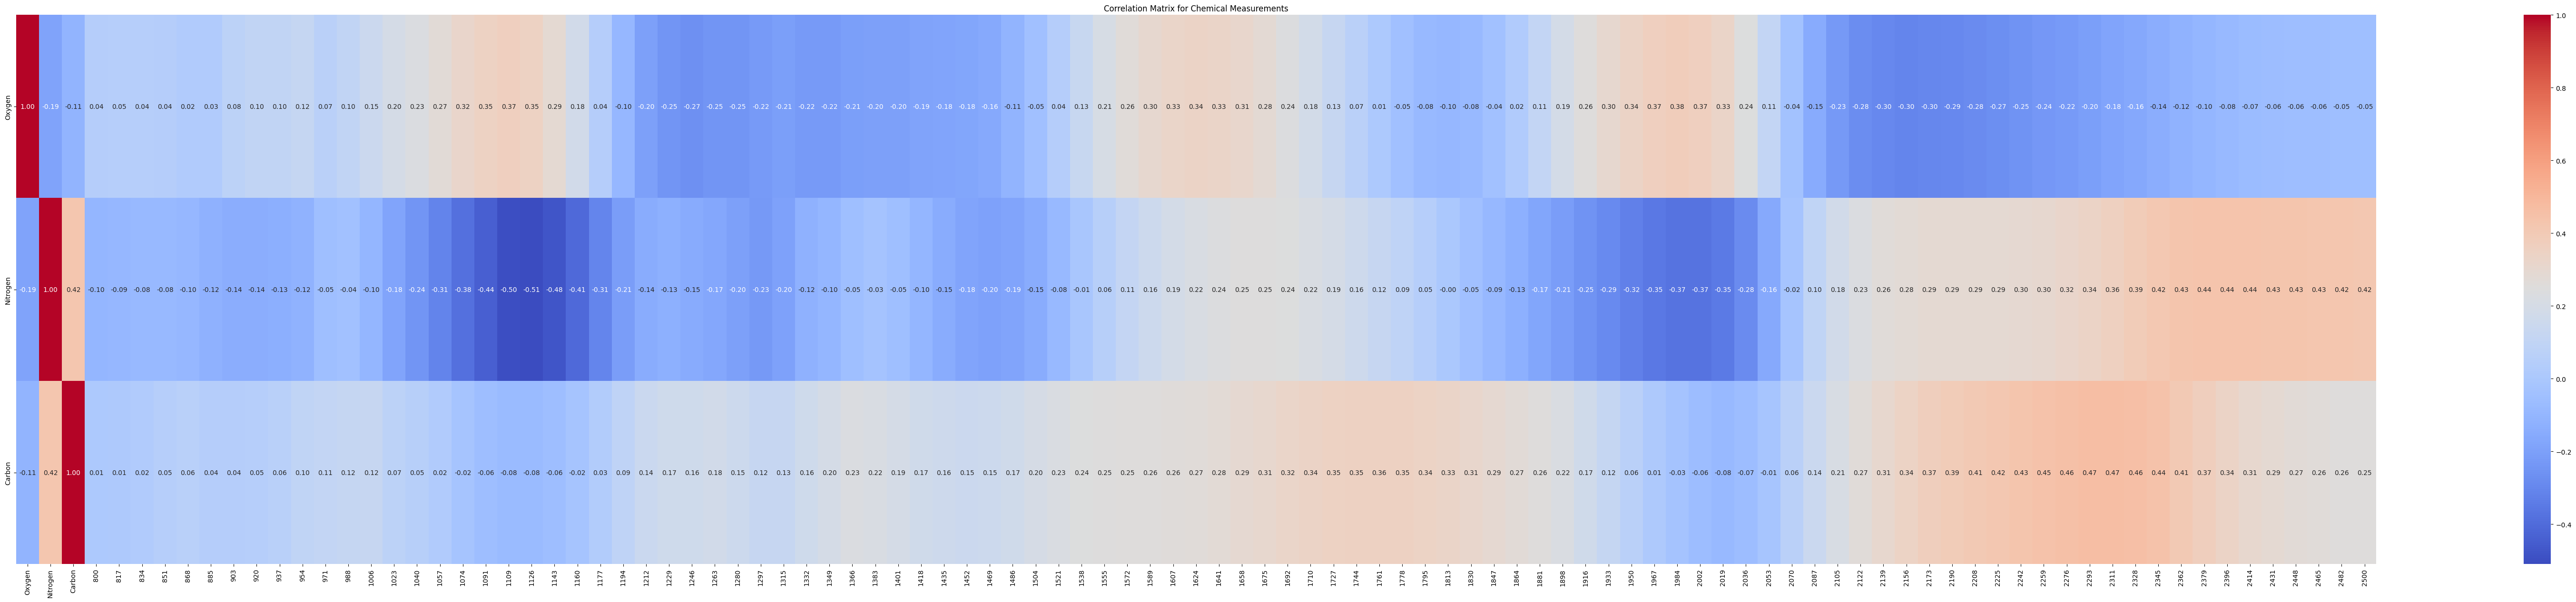

In [ ]:
# Correlation Analysis
correlation_matrix = df.drop('health', axis=1).corr()

# Extracting the correlations of the chemical measurements (Oxygen, Nitrogen, Carbon) with other variables
chemical_correlations = correlation_matrix.loc[['Oxygen', 'Nitrogen', 'Carbon'], :]

# Plotting the correlation heatmap
plt.figure(figsize=(80, 15))  # Adjust the size as necessary to ensure readability
sns.heatmap(chemical_correlations, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix for Chemical Measurements')
plt.xticks(rotation=90)
plt.show()

- Oxygen shows low correlation coefficients with the spectral data, indicating that its variation does not strongly correspond with changes in spectral measurements. It has a negative correlation with Nitrogen (-0.19 approximately) and a very weak negative correlation with Carbon (-0.11 approximately).

- Nitrogen exhibits a positive correlation with Carbon (0.42 approximately), suggesting that as nitrogen levels increase, carbon levels tend to increase as well. Its correlations with the spectral data are generally negative in the early wavelengths but become positive and strengthen as the wavelength increases, peaking around the mid to late spectral measurements.

- Carbon has very weak correlations with the early spectral measurements but shows a pattern of increasing positive correlation towards the end of the spectral range. This suggests a relationship between carbon levels and specific spectral measurements.

#### Let us perform the Mann-Whitney U test to compare the distribution of the 3 elements between Healthy and Diseased

In [ ]:
results = {}

# Conduct Mann-Whitney U tests for each element
for element in elements:
    healthy = df[df['health'] == 1][element]
    diseased = df[df['health'] == 0][element]
    stat, p = mannwhitneyu(healthy, diseased)
    results[element] = p

# Print the results
for element, p in results.items():
    print(f"{element} - Mann-Whitney U test p-value: {p}")

Carbon - Mann-Whitney U test p-value: 0.0029871645347513817
Oxygen - Mann-Whitney U test p-value: 7.370825967074484e-33
Nitrogen - Mann-Whitney U test p-value: 2.7295211243743914e-06


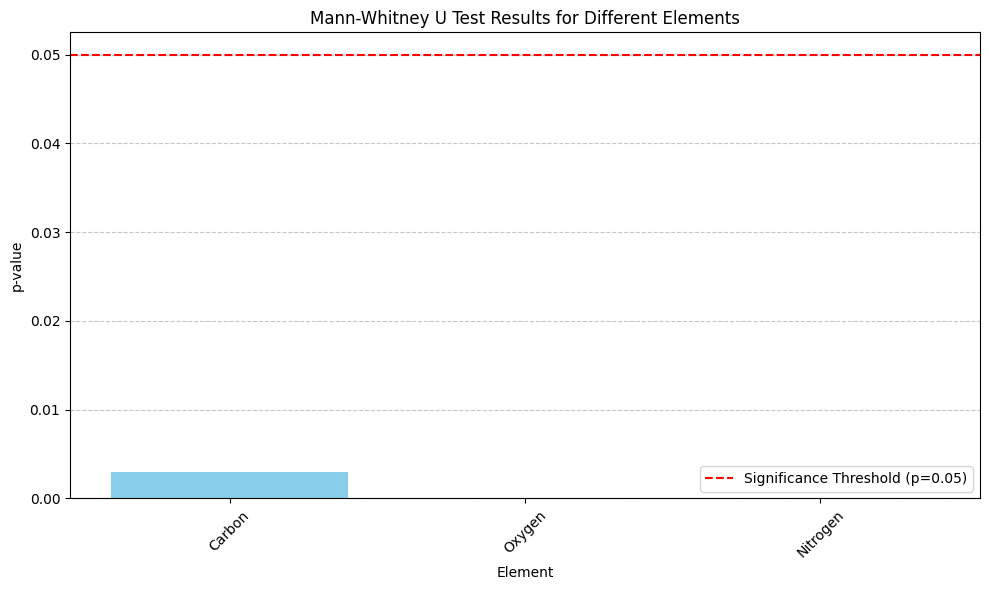

In [ ]:
# Extract element names and corresponding p-values
elements = list(results.keys())
p_values = list(results.values())

# Plotting the Mann-Whitney U test results
plt.figure(figsize=(10, 6))
plt.bar(elements, p_values, color='skyblue')
plt.title('Mann-Whitney U Test Results for Different Elements')
plt.xlabel('Element')
plt.ylabel('p-value')
plt.axhline(y=0.05, color='red', linestyle='--', label='Significance Threshold (p=0.05)')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines
plt.tight_layout()
plt.show()

From the above, we can infer that all three elements (Carbon, Oxygen, and Nitrogen) show statistically significant differences in levels between healthy and diseased plants.

#### Let us try to find a decision boundary to find the threshold between a healthy and diseased plant based on Elemental readings

In [ ]:
thresholds = {}

for element in elements:
    # Prepare the feature matrix (X) and target vector (y)
    X = df[[element]]  # We use double brackets to keep X as a DataFrame
    y = df['health']

    # Initialize the DecisionTreeClassifier
    # We limit the tree depth to 1 for simplicity (i.e., one decision rule)
    tree = DecisionTreeClassifier(max_depth=1, random_state=42)

    # Fit the tree to the data
    tree.fit(X, y)

    # Extract the decision rule
    tree_rules = export_text(tree, feature_names=[element])
    thresholds[element] = tree_rules

# Print the thresholds
for element, rules in thresholds.items():
    print(f"Decision rules for {element}:\n{rules}")

Decision rules for Carbon:
|--- Carbon <= 1.71
|   |--- class: 1
|--- Carbon >  1.71
|   |--- class: 0

Decision rules for Oxygen:
|--- Oxygen <= 13.89
|   |--- class: 0
|--- Oxygen >  13.89
|   |--- class: 1

Decision rules for Nitrogen:
|--- Nitrogen <= 5.10
|   |--- class: 1
|--- Nitrogen >  5.10
|   |--- class: 0



**Carbon:** A threshold value is determined at Carbon ≤ 1.71. According to the decision tree, if the Carbon content is less than or equal to 1.71, the plant is likely to be classified as healthy (class 1), and if it's greater, it's likely to be classified as diseased (class 0).

**Oxygen:** The threshold for Oxygen is set at ≤ 13.89. Plants with Oxygen content less than or equal to 13.89 tend to be diseased (class 0), while those with greater Oxygen content tend to be healthy (class 1).

**Nitrogen:** Nitrogen content has a threshold at ≤ 5.10. Plants with Nitrogen content less than or equal to 5.10 are likely healthy (class 1), whereas higher values are associated with diseased plants (class 0).

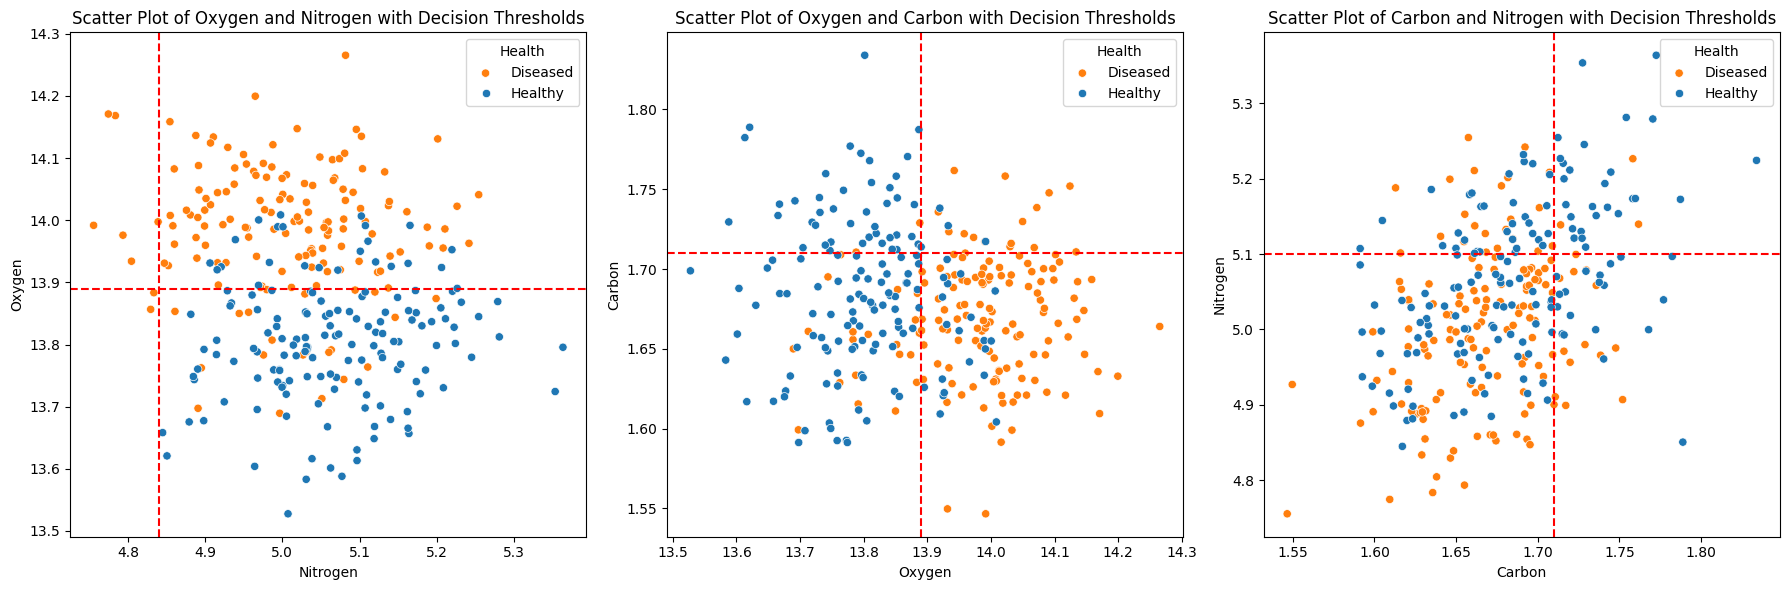

In [ ]:
# Create subplots for all three scatter plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Scatter plot for Oxygen and Nitrogen
sns.scatterplot(x='Nitrogen', y='Oxygen', hue='health', data=df, ax=axes[0])
axes[0].axhline(y=13.89, color='red', linestyle='--')  # Oxygen threshold
axes[0].axvline(x=4.84, color='red', linestyle='--')  # Nitrogen threshold
axes[0].set_xlabel('Nitrogen')
axes[0].set_ylabel('Oxygen')
axes[0].set_title('Scatter Plot of Oxygen and Nitrogen with Decision Thresholds')
axes[0].legend(title='Health', labels=['Diseased', 'Healthy'])

# Scatter plot for Oxygen and Carbon
sns.scatterplot(x='Oxygen', y='Carbon', hue='health', data=df, ax=axes[1])
axes[1].axhline(y=1.71, color='red', linestyle='--')  # Carbon threshold
axes[1].axvline(x=13.89, color='red', linestyle='--')  # Oxygen threshold
axes[1].set_xlabel('Oxygen')
axes[1].set_ylabel('Carbon')
axes[1].set_title('Scatter Plot of Oxygen and Carbon with Decision Thresholds')
axes[1].legend(title='Health', labels=['Diseased', 'Healthy'])

# Scatter plot for Carbon and Nitrogen
sns.scatterplot(x='Carbon', y='Nitrogen', hue='health', data=df, ax=axes[2])
axes[2].axhline(y=5.10, color='red', linestyle='--')  # Nitrogen threshold
axes[2].axvline(x=1.71, color='red', linestyle='--')  # Carbon threshold
axes[2].set_xlabel('Carbon')
axes[2].set_ylabel('Nitrogen')
axes[2].set_title('Scatter Plot of Carbon and Nitrogen with Decision Thresholds')
axes[2].legend(title='Health', labels=['Diseased', 'Healthy'])

plt.tight_layout()
plt.show()


### Let us know analyze the spectral data

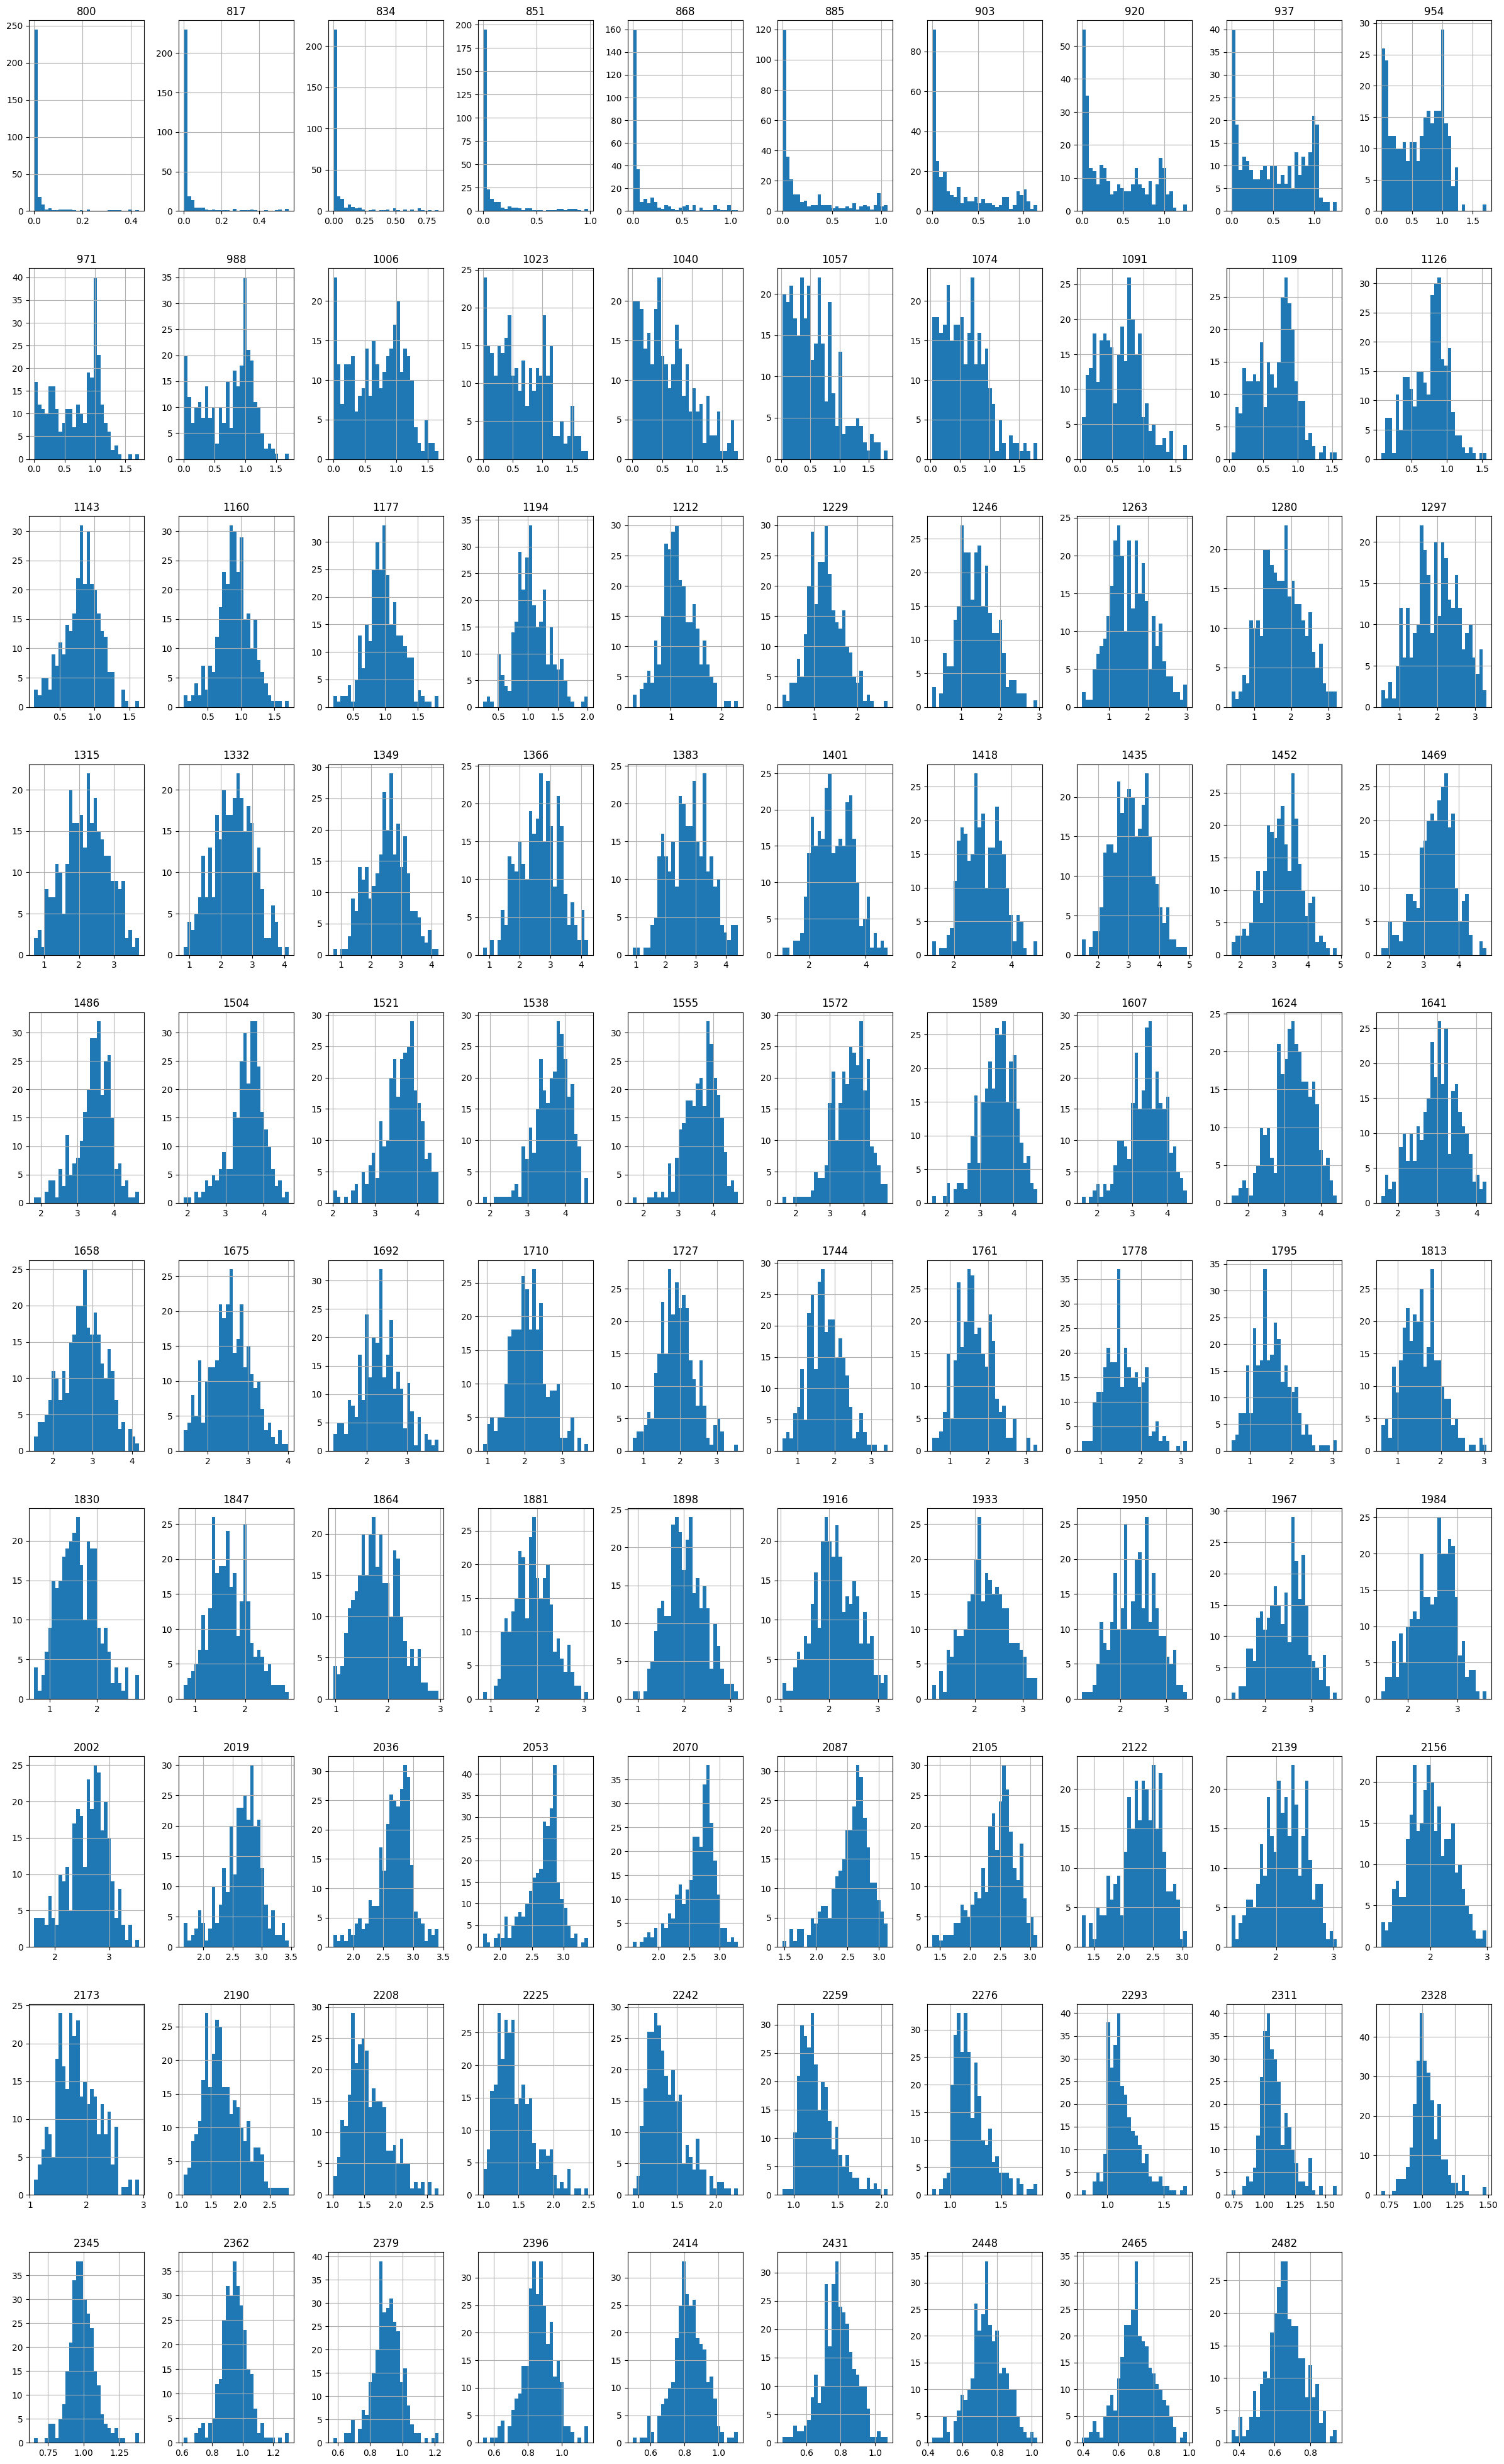

In [ ]:
df[wavelength_columns].hist(bins=30, figsize=(30, 50))
plt.show()

In [ ]:
def view_spectrum(wavelength):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[df['health'] == 1][wavelength], kde=True, color='green', label='Healthy')
    sns.histplot(df[df['health'] == 0][wavelength], kde=True, color='red', label='Diseased')
    plt.title(f'Distribution of {wavelength} by Health Status')
    plt.xlabel(wavelength)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

# Create a dropdown widget for selecting the wavelength
wavelength_dropdown = widgets.Dropdown(options=wavelength_columns, description='Wavelength')

# Interact function to update the plot based on the selected wavelength
interact(view_spectrum, wavelength=wavelength_dropdown)

interactive(children=(Dropdown(description='Wavelength', options=('800', '817', '834', '851', '868', '885', '9…

<function __main__.view_spectrum(wavelength)>

##### Let us try to find the threshold value for each spectra which classifies a plant as healthy or diseased

In [ ]:
# Separate the dataset into healthy and diseased based on 'health' column
healthy = df[df['health'] == 1]
diseased = df[df['health'] == 0]

# Calculate the mean spectral values for both healthy and diseased plants
mean_healthy = healthy[wavelength_columns].mean()
mean_diseased = diseased[wavelength_columns].mean()

# Calculate the threshold for each spectral value as the average between the means of healthy and diseased plants
thresholds = (mean_healthy + mean_diseased) / 2

# Display the calculated thresholds
print(thresholds.to_string())

800     0.020416
817     0.035871
834     0.061126
851     0.098436
868     0.152902
885     0.228143
903     0.317935
920     0.412712
937     0.520436
954     0.608646
971     0.687010
988     0.722293
1006    0.699232
1023    0.650265
1040    0.597228
1057    0.569975
1074    0.580707
1091    0.618389
1109    0.670363
1126    0.739847
1143    0.817449
1160    0.897627
1177    0.978463
1194    1.062637
1212    1.155738
1229    1.261939
1246    1.397811
1263    1.566734
1280    1.767988
1297    1.989853
1315    2.200867
1332    2.385403
1349    2.534490
1366    2.654216
1383    2.778784
1401    2.884314
1418    2.993601
1435    3.104226
1452    3.224666
1469    3.346919
1486    3.460757
1504    3.556595
1521    3.625402
1538    3.659795
1555    3.654487
1572    3.606487
1589    3.515224
1607    3.382664
1624    3.213346
1641    3.014240
1658    2.794332
1675    2.563993
1692    2.334266
1710    2.116246
1727    1.920631
1744    1.757339
1761    1.634774
1778    1.558872
1795    1.5321

We calculated the average threshold for various spectra; plants having a lower spectra value than the threshold for each spectra tend to be diseased as compared to plants with a spectra value above the threshold.

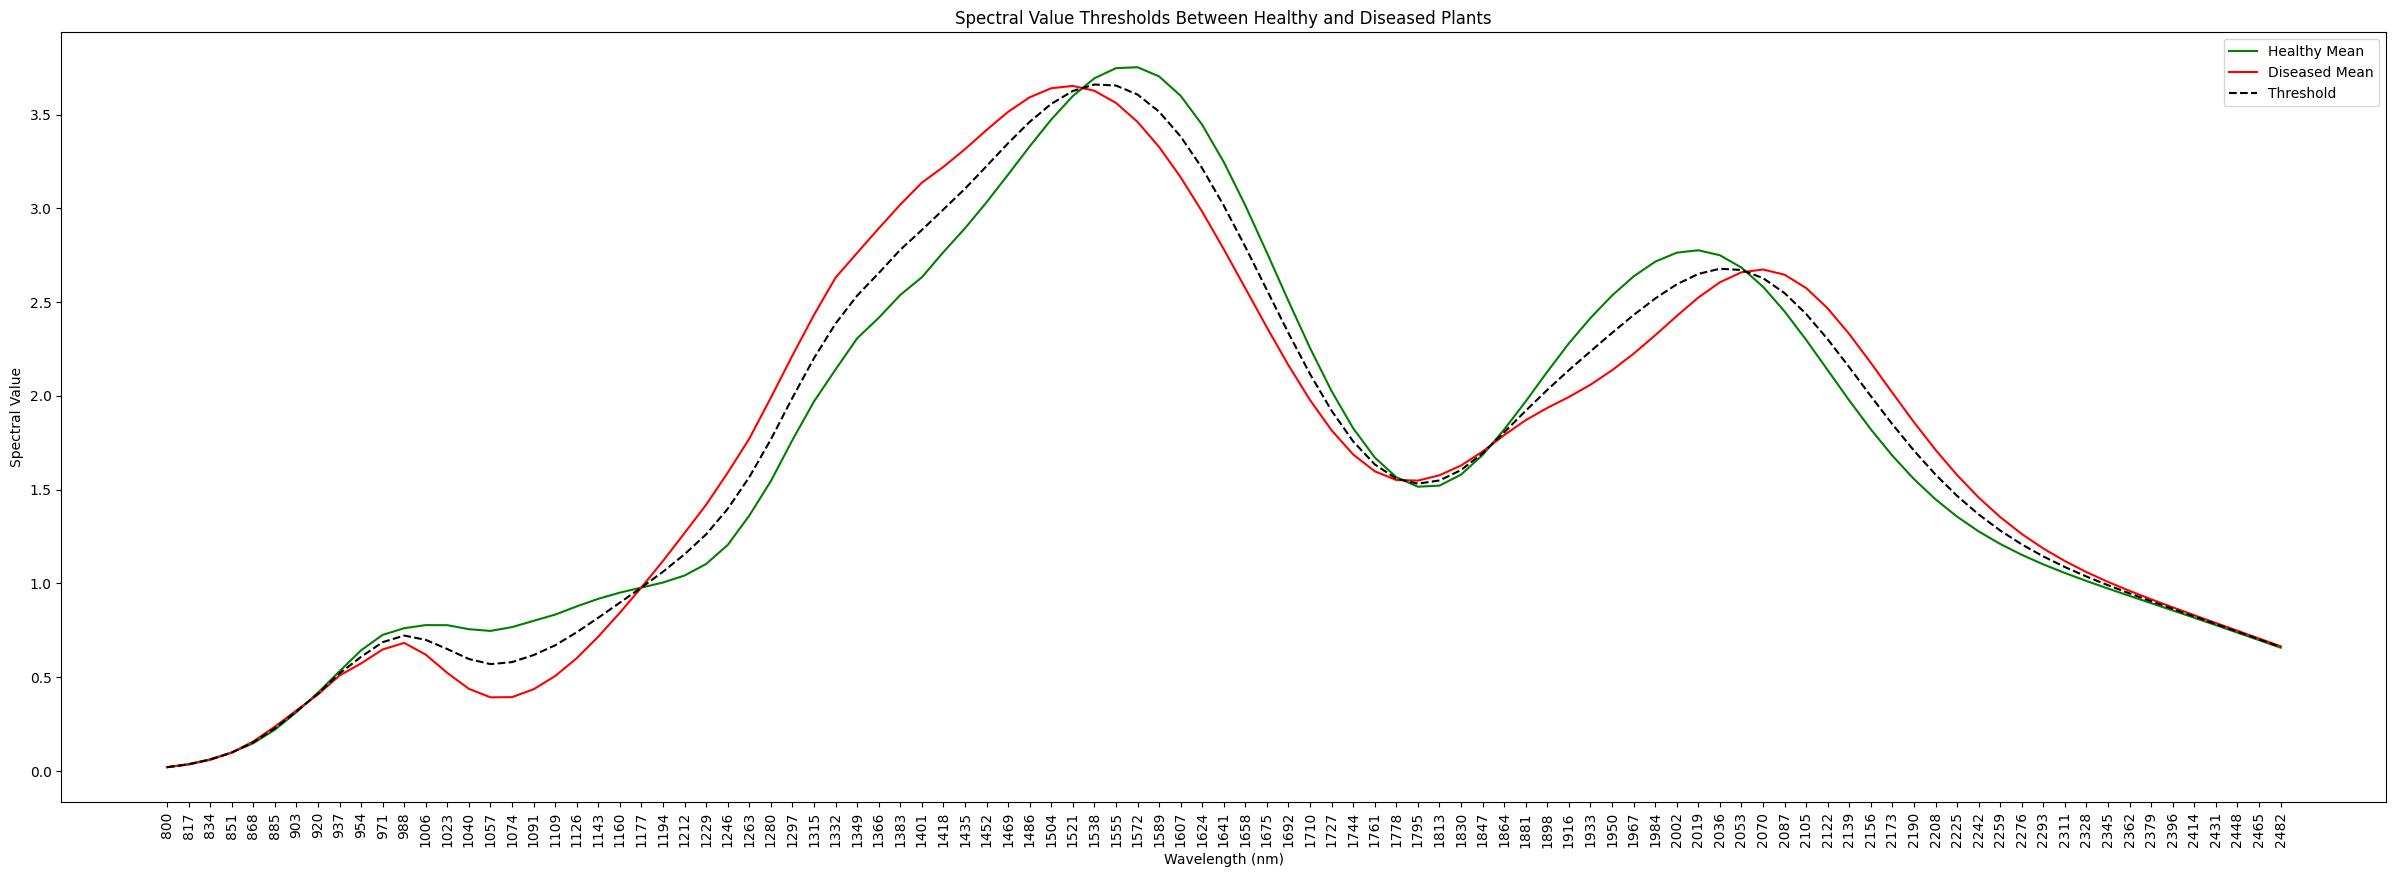

In [ ]:
plt.figure(figsize=(30, 10))

# Plot the mean spectral values for healthy plants
plt.plot(mean_healthy.index, mean_healthy.values, label='Healthy Mean', color='green')

# Plot the mean spectral values for diseased plants
plt.plot(mean_diseased.index, mean_diseased.values, label='Diseased Mean', color='red')

# Plot the thresholds
plt.plot(thresholds.index, thresholds.values, label='Threshold', color='black', linestyle='--')

plt.title('Spectral Value Thresholds Between Healthy and Diseased Plants')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Spectral Value')
plt.legend()
plt.xticks(rotation=90)  # Adjust rotation if necessary for better label readability
plt.show()

**Peaks and Troughs:** The specific points where the healthy and diseased lines diverge and converge are of particular interest. Divergence might indicate wavelengths where the presence of disease has a more significant effect on the spectral values, which could be useful for diagnostic purposes.

**Wavelengths of Interest:** The wavelengths where the healthy and diseased lines are farthest apart might be especially relevant for distinguishing between health statuses.

**Threshold Crossing:** The areas where the green and red lines cross the black dashed threshold line might indicate regions of the spectrum where it becomes more challenging to differentiate between healthy and diseased plants using the mean values alone.

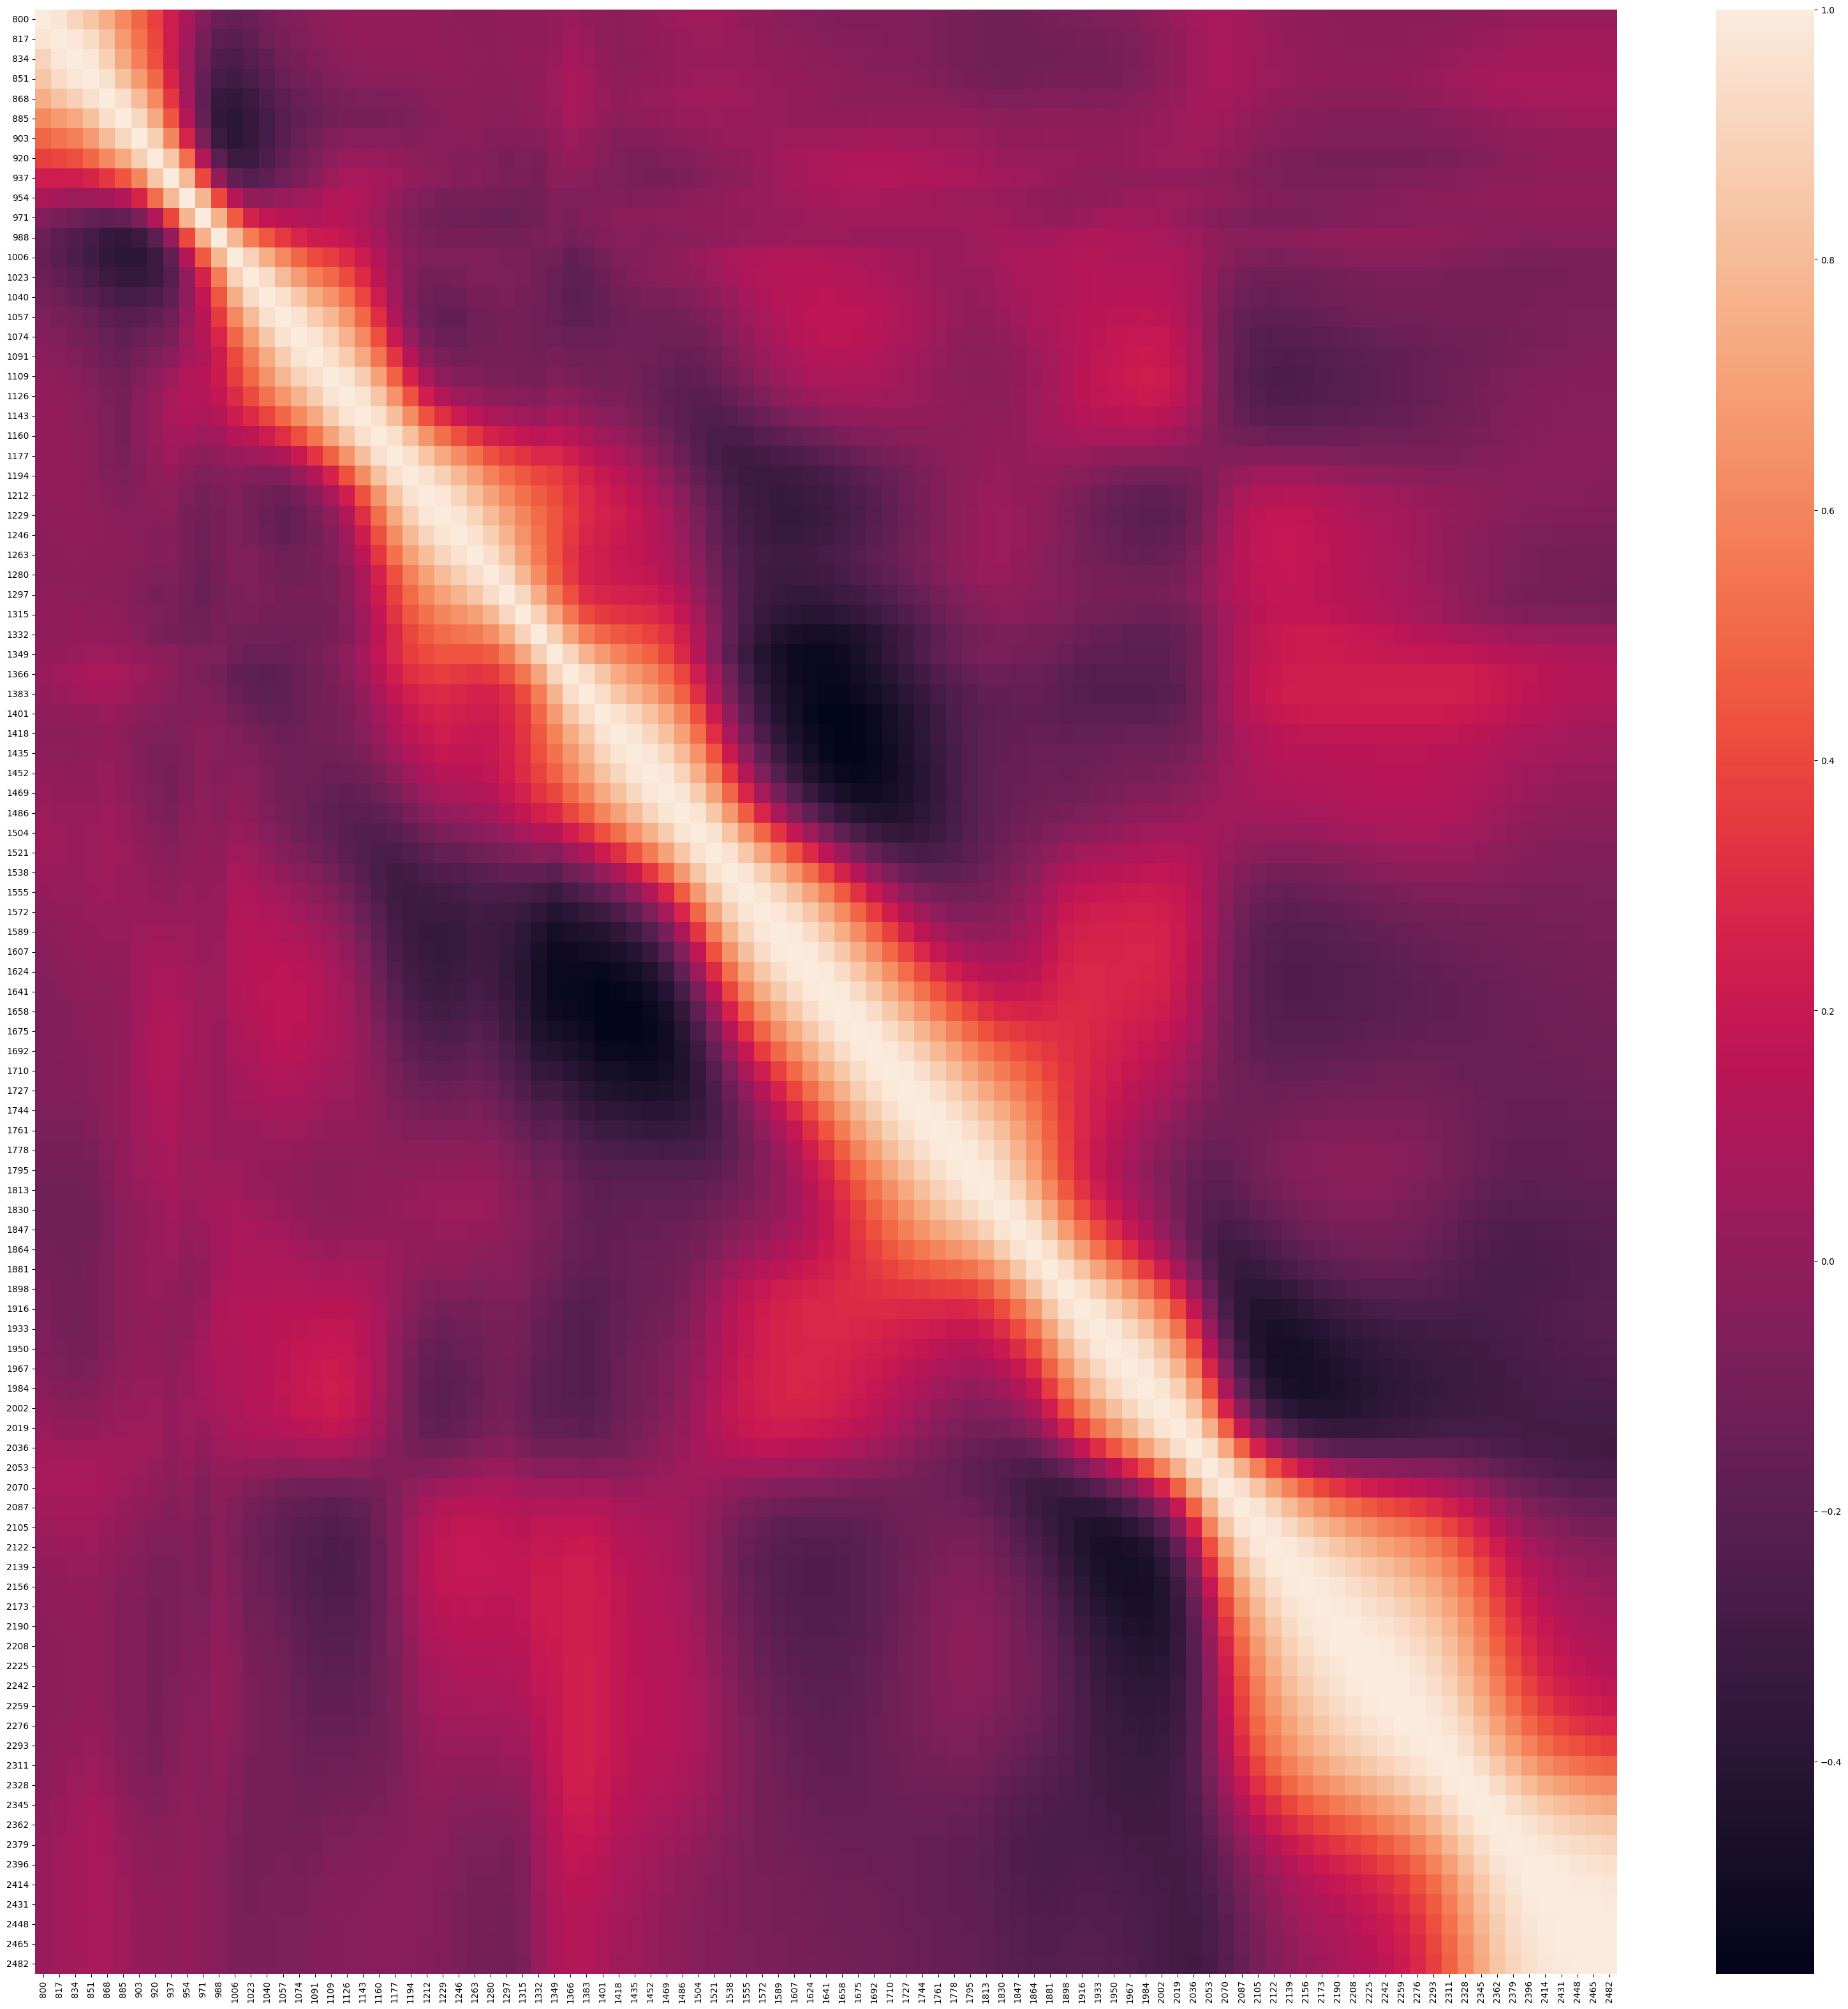

In [ ]:
corr_matrix = df[wavelength_columns].corr()
plt.figure(figsize=(40, 40))
sns.heatmap(corr_matrix, annot=False, fmt=".2f")
plt.show()

We see there is generally strong correlation along the diagonal which suggests wavelenghts of similar wavelength behave similarly.

#### Let us try to find the feature importance of various wavelengths

In [ ]:
# Define features and target variable
X = df.iloc[:, 4:-1]  # Assuming spectral data is all columns except the first three and the last one
y = df['health']  # Assuming the last column is the binary target variable 'health'

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Initialize the RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
# Fit the model
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Get feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

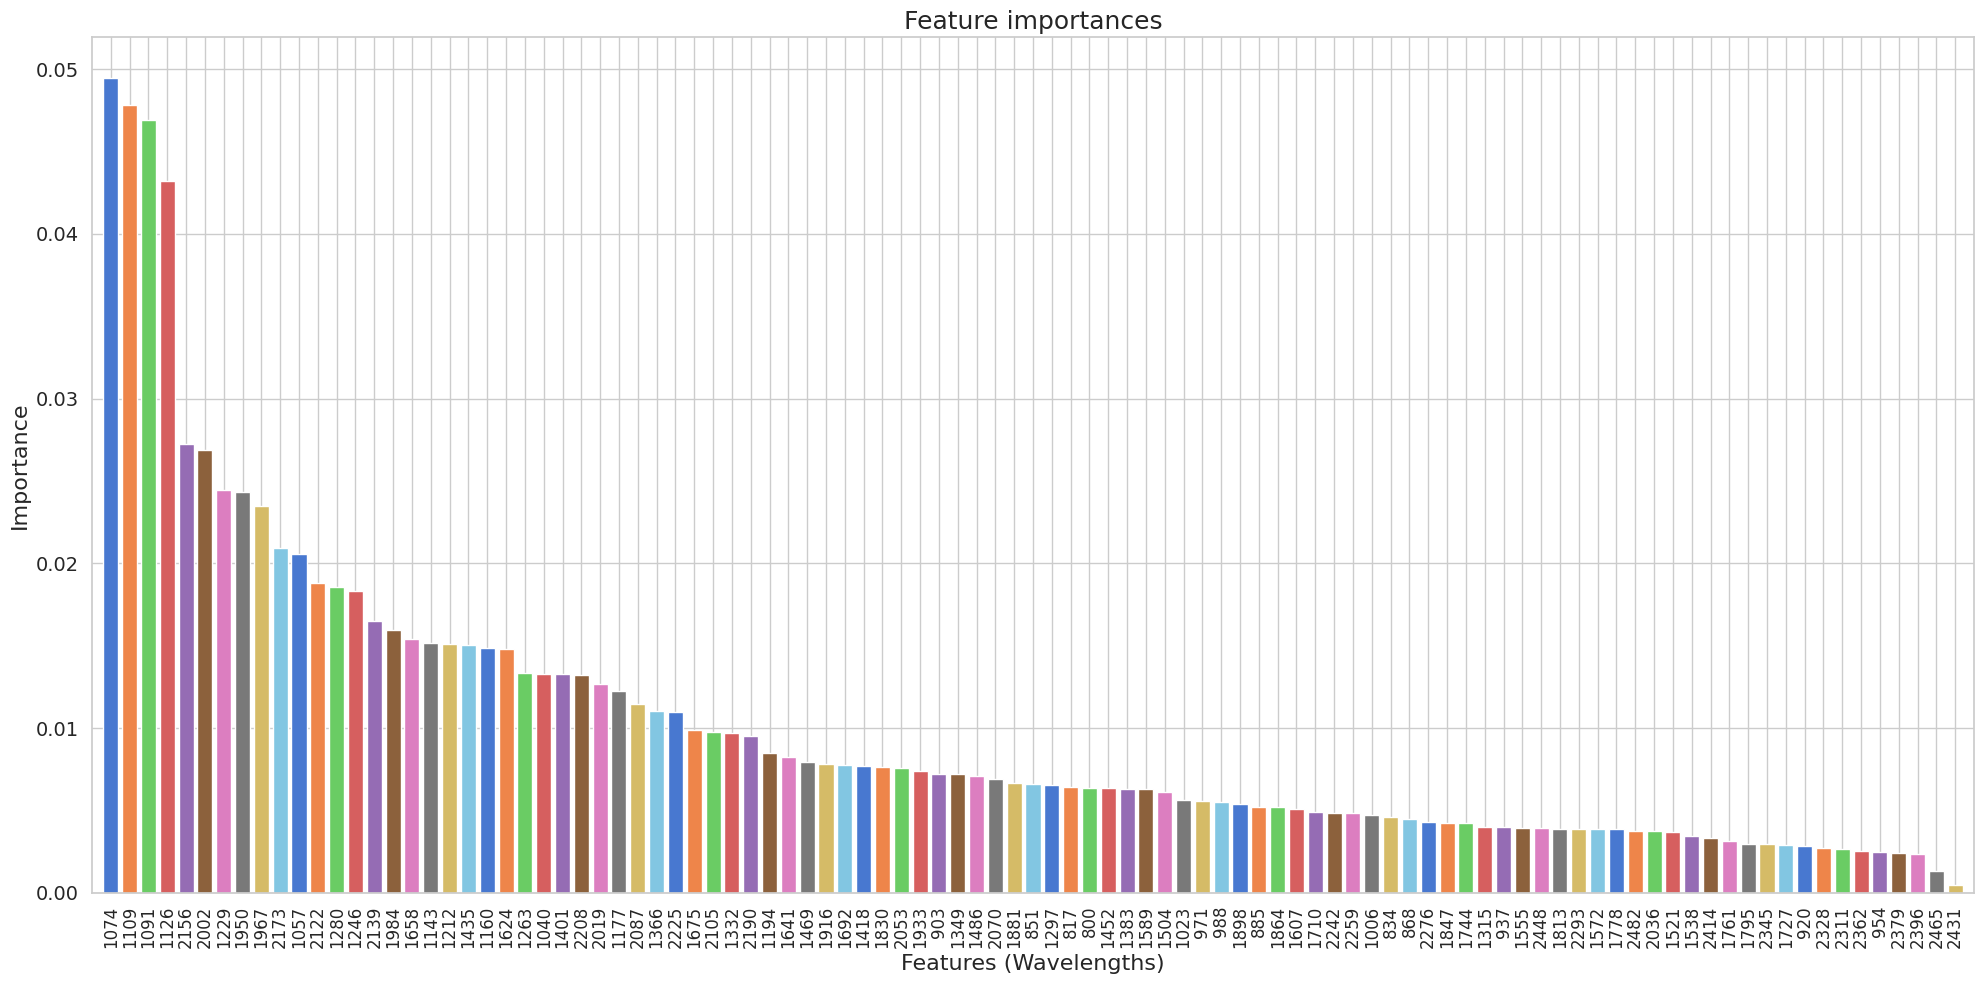

In [ ]:
# Improve overall aesthetics with seaborn
sns.set_theme(context='notebook', style='whitegrid')

# Plot the feature importances
plt.figure(figsize=(20, 10))  # Adjust the figure size as needed
plt.title("Feature importances", fontsize=18)
plt.bar(range(X_train.shape[1]), importances[indices], align="center", color=sns.color_palette("muted", X_train.shape[1]))

# Improve the spacing and readability of the x-axis labels
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90, fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Features (Wavelengths)', fontsize=16)
plt.ylabel('Importance', fontsize=16)

# Set the limits and spacing of the x-axis
plt.xlim(-1, X_train.shape[1])
plt.tight_layout()  # Adjust layout to fit everything nicely

plt.show()

#### Let us reduce the number of features to reduce the dimentionality of our dataset

#### Applying PCA

In [ ]:
nir_columns = [col for col in df.columns if df[col].dtype != 'object']
X_nir_new = df[nir_columns]


# Applying PCA to the NIR spectral data to reduce it to 2 principal components
pca_nir_new = PCA(n_components=2)
X_nir_pca_new = pca_nir_new.fit_transform(X_nir_new)


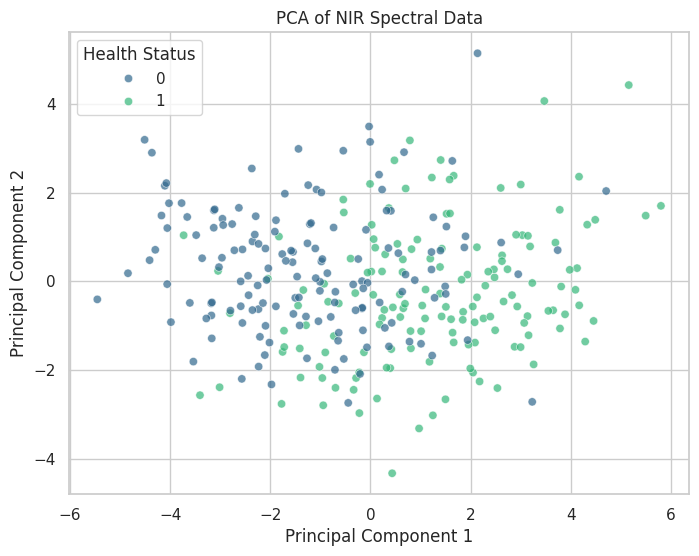

In [ ]:
# Creating a DataFrame for the PCA components with health status from the newly loaded dataset
# Assuming the health status is stored in a column named similarly to 'health'. Adjust if necessary.
if 'health' in df.columns:
    health_status_new = df['health']
else:
    # Placeholder if 'health' column doesn't exist, replace with your actual health status column
    health_status_new = pd.Series([0] * len(df))

df_pca_nir_new = pd.DataFrame({
    'PC1': X_nir_pca_new[:, 0],
    'PC2': X_nir_pca_new[:, 1],
    'Health': health_status_new.values  # Ensuring alignment with PCA components
})

# Plotting the PCA-reduced NIR spectral data
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca_nir_new, x='PC1', y='PC2', hue='Health', palette='viridis', alpha=0.7)
plt.title('PCA of NIR Spectral Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Health Status')
plt.show()

- There is a broad spread of data points along both principal component axes, with PC1 exhibiting a particularly wide range of values, indicating it captures a significant portion of the variance within the spectral data.

- There is considerable overlap between the "good" and "disease1" points. This indicates that the NIR spectral data, when reduced to these two principal components, does not clearly separate the two health statuses. It may suggest that other factors not captured by these two components might be influential in differentiating the health status of the samples.

- Both "good" and "disease1" points are distributed throughout the range of both principal components. However, it seems that the "disease1" points might be slightly more spread along PC2, but without a clear separation boundary.

- The overlap implies that for classification purposes, relying solely on PC1 and PC2 may not be sufficient to accurately classify the health status. More components might need to be considered, or other machine learning techniques might be required for better discrimination.

##### **Let us try to increase the dimension up to 5 to see if we can capture more information**

In [ ]:
X_nir = df[nir_columns]

# Increasing the number of principal components
pca_nir_more = PCA(n_components=5)  # Adjust this number as needed
X_nir_pca_more = pca_nir_more.fit_transform(X_nir)

# Display the explained variance ratio by the new components
explained_variance_nir_more = pca_nir_more.explained_variance_ratio_
cumulative_explained_variance_nir_more = np.cumsum(explained_variance_nir_more)
print("Explained variance by each component:", explained_variance_nir_more)
print("Cumulative explained variance:", cumulative_explained_variance_nir_more)


Explained variance by each component: [0.30522369 0.12978883 0.10300855 0.08466937 0.06929501]
Cumulative explained variance: [0.30522369 0.43501252 0.53802107 0.62269044 0.69198545]


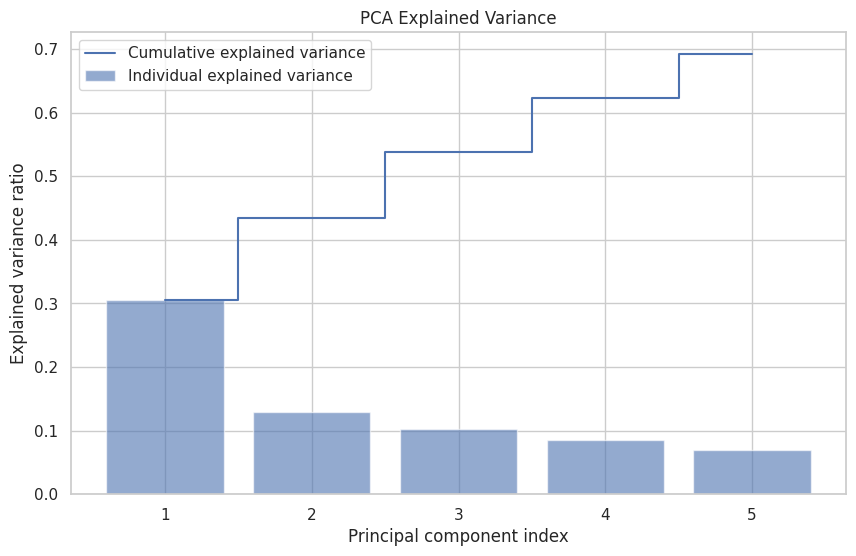

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(range(1, 6), explained_variance_nir_more, alpha=0.6, align='center', label='Individual explained variance')
plt.step(range(1, 6), cumulative_explained_variance_nir_more, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.title('PCA Explained Variance')
plt.show()

The above graph shows that we have been able to capture about 70% of the original dataset's variance on increasing the number of dimensions.

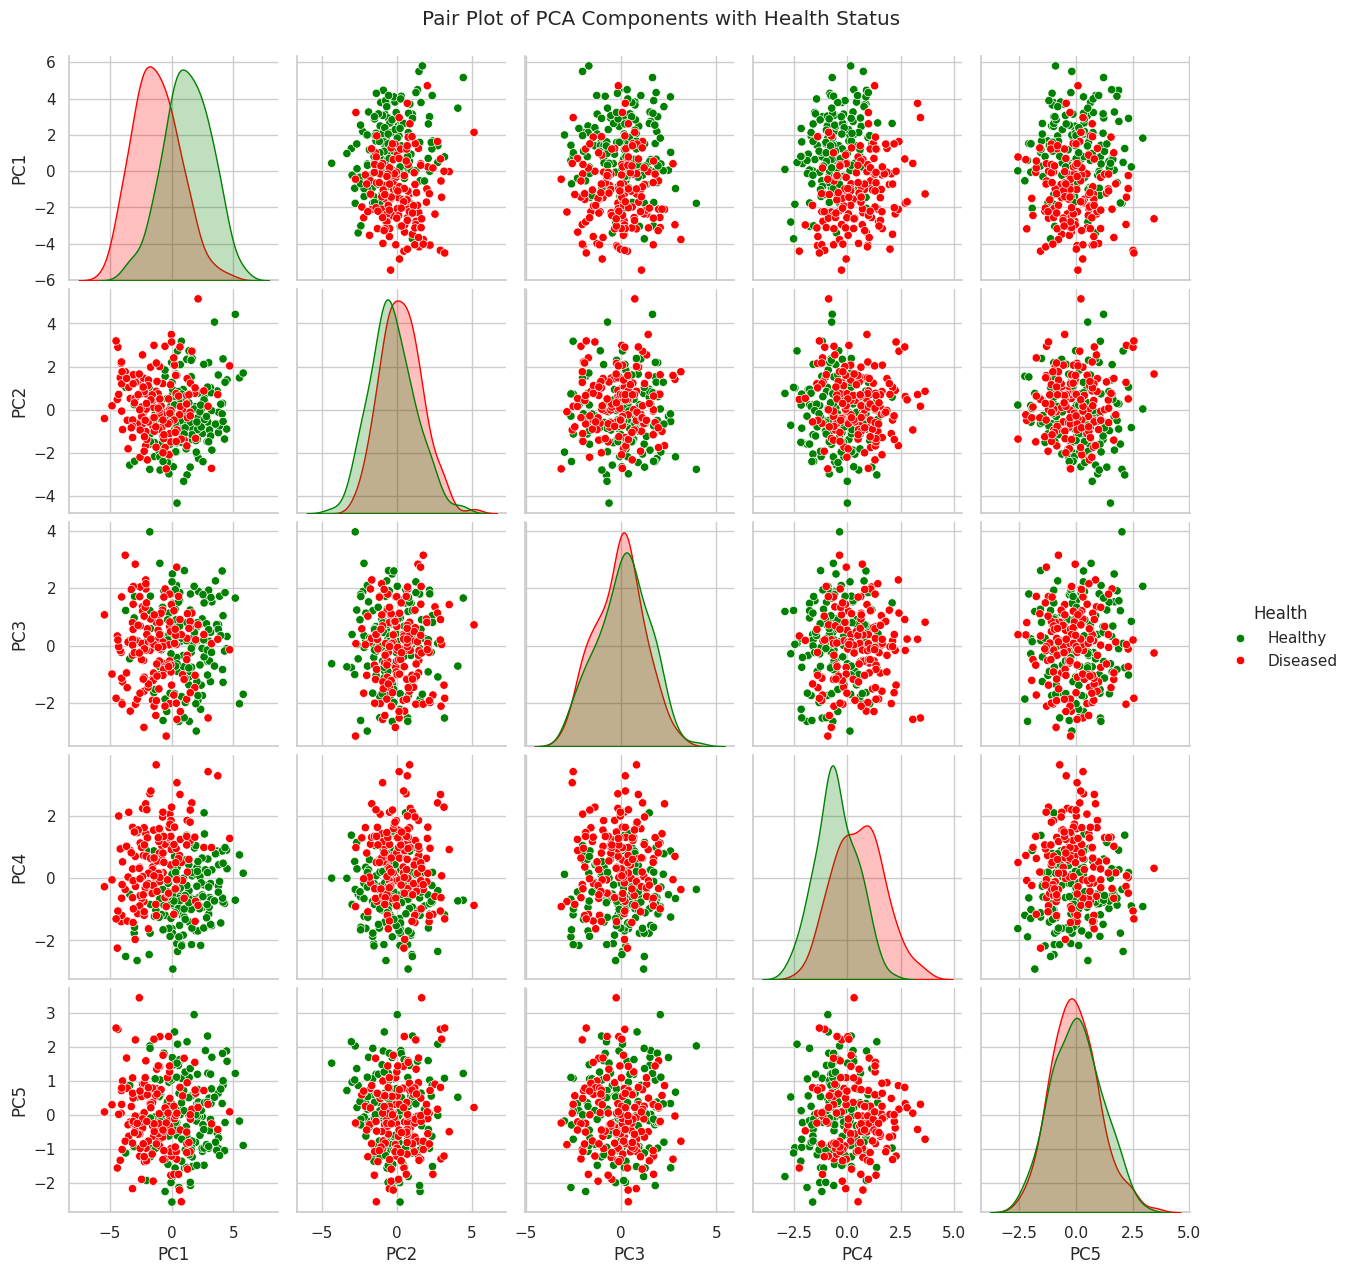

In [ ]:
# Map health status to categorical labels
df['health_label'] = df['health'].map({1: 'Healthy', 0: 'Diseased'})

# Create a DataFrame with PCA components and health status
pca_df = pd.DataFrame(X_nir_pca_more, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
pca_df['Health'] = df['health_label']

# Create pair plot
sns.pairplot(pca_df, hue='Health', palette={'Healthy': 'green', 'Diseased': 'red'})
plt.suptitle('Pair Plot of PCA Components with Health Status', y=1.02)
plt.show()


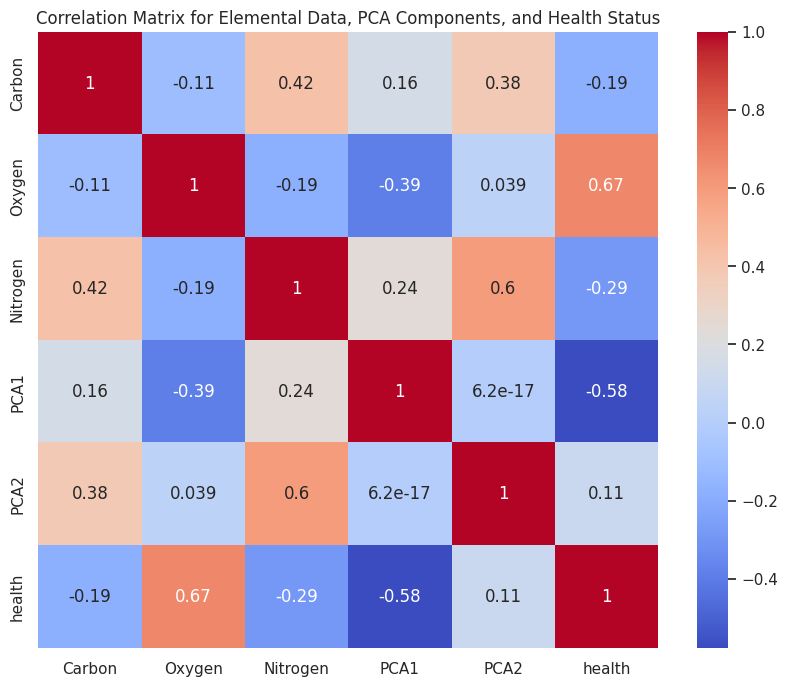

In [ ]:
df['health'] = df['health'].map({'good': 1, 'disease1': 0}).astype(int)

# Specifying the elemental columns you want to include in the analysis
elemental_columns = ['Carbon', 'Oxygen', 'Nitrogen']  # Adjust these column names based on your dataset

# Identify all numeric columns for PCA, excluding 'health' and non-elemental columns
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
# Remove 'health' from numeric columns if it's included
numeric_columns = [col for col in numeric_columns if col not in elemental_columns + ['health']]

# Scale the numeric data (excluding elemental and health data)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[numeric_columns])

# Perform PCA on the scaled data
pca = PCA(n_components=2)
pca_components = pca.fit_transform(data_scaled)

# Add PCA components to the DataFrame
df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]

# Calculate the correlation matrix for PCA components, elemental data, and 'health' status
columns_for_correlation = elemental_columns + ['PCA1', 'PCA2', 'health']
correlation_matrix = df[columns_for_correlation].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix for Elemental Data, PCA Components, and Health Status')
plt.show()
